
## Project_YoutubeVideoStatistics


Team Project/PH Part: Dependancies - Gettiing to know the Data -  Cleaning data - Analysis of Relationship and Visualization 

##### Ares of Interest: channels/views/likes/dislikes..

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import seaborn as sns

# data files
dataset_path = "../Resources/USvideos.csv"
# results_path = "../Resources/Project_results.csv"

# Read the data 
data_df = pd.read_csv(dataset_path)

data_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


## Gettiing to know the data





In [2]:
data_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [3]:
data_df.shape

(40949, 16)

In [4]:
#number of videos in the set
video_count =len(data_df["video_id"].value_counts())
print(f"Total number of unique videos (by video_id) in the dataset is {video_count}.")


Total number of unique videos (by video_id) in the dataset is 6351.


In [5]:
#statistical summary of numerical columns
data_df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [6]:
#categories
data_df.describe(include=np.object)

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
count,40949,40949,40949,40949,40949,40949,40949,40379
unique,6351,205,6455,2207,6269,6055,6352,6901
top,j4KvrAUjn6c,18.22.01,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,► Listen LIVE: http://power1051fm.com/\n► Face...
freq,30,200,30,203,50,1535,30,58


In [7]:
#columns and their data types
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [8]:
data_df.nunique()

video_id                   6351
trending_date               205
title                      6455
channel_title              2207
category_id                  16
publish_time               6269
tags                       6055
views                     40478
likes                     29850
dislikes                   8516
comment_count             13773
thumbnail_link             6352
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6901
dtype: int64

In [9]:
#check unique column video_id
data_df['video_id'].unique()

array(['2kyS6SvSYSE', '1ZAPwfrtAFY', '5qpjK5DgCt4', ..., '6h8QgZF5Qu4',
       'mpnshdmtE2Y', 'yz7Xq3T0YPs'], dtype=object)

In [10]:
#check unique column 
data_df['publish_time'].unique()

array(['2017-11-13T17:13:01.000Z', '2017-11-13T07:30:00.000Z',
       '2017-11-12T19:05:24.000Z', ..., '2018-06-13T05:27:27.000Z',
       '2018-06-12T16:03:58.000Z', '2018-06-13T09:00:06.000Z'],
      dtype=object)

## Cleaning Data

In [11]:
#check for Null values
data_df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [12]:
#remove duplicates
# data_df = data_df.drop_duplicates() runs the same number as withhout param
data_df = data_df.drop_duplicates(subset=None, keep='first', inplace=False)
data_df.shape


(40901, 16)

In [13]:
# data_df = data_df.drop_duplicates(subset=None, keep='first', inplace=False)
# data_df.shape

In [14]:

clean_df = data_df.rename(columns={
                                    "video_id":"Video ID",
                                    "views":"Total Views",
                                    "likes":"Total Likes",
                                    "dislikes":"Total Dislikes",
                                    "channel_title":"Channel Title",
                                    "publish_time":"Time Published",
                                    "trending_date":"Trending Date",
                                    "comment_count":"Number of Comments"
                                   })

clean_df.head()

#create clean_df with columns of interest instead of dropping
clean_df = clean_df[['Video ID','Total Views','Total Likes', 'Total Dislikes','Channel Title','Time Published','Trending Date','Number of Comments']] 


clean_df

,Video ID,Total Views,Total Likes,Total Dislikes,Channel Title,Time Published,Trending Date,Number of Comments
0,2kyS6SvSYSE,748374,57527,2966,CaseyNeistat,2017-11-13T17:13:01.000Z,17.14.11,15954
1,1ZAPwfrtAFY,2418783,97185,6146,LastWeekTonight,2017-11-13T07:30:00.000Z,17.14.11,12703
2,5qpjK5DgCt4,3191434,146033,5339,Rudy Mancuso,2017-11-12T19:05:24.000Z,17.14.11,8181
3,puqaWrEC7tY,343168,10172,666,Good Mythical Morning,2017-11-13T11:00:04.000Z,17.14.11,2146
4,d380meD0W0M,2095731,132235,1989,nigahiga,2017-11-12T18:01:41.000Z,17.14.11,17518
...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,1685609,38160,1385,AaronsAnimals,2018-05-18T13:00:04.000Z,18.14.06,2657
40945,1h7KV2sjUWY,1064798,60008,382,zefrank1,2018-05-18T01:00:06.000Z,18.14.06,3936
40946,D6Oy4LfoqsU,1066451,48068,1032,Brad Mondo,2018-05-18T17:34:22.000Z,18.14.06,3992
40947,oV0zkMe1K8s,5660813,192957,2846,How It Should Have Ended,2018-05-17T17:00:04.000Z,18.14.06,13088


In [15]:
# modifying clean_df/dropping duplicates

clean_df = clean_df.sort_values(["Video ID", "Trending Date"], ascending=False)
clean_df = clean_df.drop_duplicates("Video ID", keep='first')
clean_df

,Video ID,Total Views,Total Likes,Total Dislikes,Channel Title,Time Published,Trending Date,Number of Comments
16559,zzQsGL_F9_c,199041,1415,121,Budweiser,2018-01-30T18:30:04.000Z,18.06.02,62
144,zy0b9e40tK8,378750,5642,146,Netflix,2017-11-09T09:00:07.000Z,17.14.11,675
36944,zxwfDlhJIpw,8442986,166520,19462,Kanye West,2018-05-01T15:57:06.000Z,18.25.05,48467
1183,zxUwbflE1SY,225280,5770,150,Cut,2017-11-13T13:00:10.000Z,17.19.11,1312
27082,zwEn-ambXLw,190898,6731,113,Shoshana Bean,2018-03-22T08:30:07.000Z,18.31.03,292
...,...,...,...,...,...,...,...,...
584,-2RVw2_QyxQ,71089,460,27,Saint Louis Chess Club,2017-11-12T02:39:01.000Z,17.16.11,20
3237,-1yT-K3c6YI,198315,6950,184,Molly Burke,2017-11-28T18:30:43.000Z,17.30.11,735
31773,-1Hm41N0dUs,1882352,38165,530,Jimmy Kimmel Live,2018-04-27T07:30:02.000Z,18.30.04,1412
15457,-0NYY8cqdiQ,563746,4429,54,TheEllenShow,2018-01-29T14:00:39.000Z,18.01.02,94


## Analysis of Relationship and Visualization

In [16]:
# pop channeles 
pop_channel= pd.DataFrame(clean_df.groupby(['Channel Title']).sum()["Total Likes"])

pop_channel = pop_channel.reset_index()

pop_channel = pop_channel.sort_values(by =["Total Likes"], ascending=False)

pop_channel.head(20)

,Channel Title,Total Likes
2086,ibighit,21874432
540,Dude Perfect,6011089
1051,Logan Paul Vlogs,5602595
1513,SMTOWN,5489574
560,Ed Sheeran,4946088
358,ChildishGambinoVEVO,4934188
1126,Marvel Entertainment,4776729
2104,jypentertainment,4446336
1696,TaylorSwiftVEVO,4074263
1524,Safiya Nygaard,3248088


In [17]:
#top 15/popular
pop_channel = pop_channel.iloc[:15,:]
pop_channel

,Channel Title,Total Likes
2086,ibighit,21874432
540,Dude Perfect,6011089
1051,Logan Paul Vlogs,5602595
1513,SMTOWN,5489574
560,Ed Sheeran,4946088
358,ChildishGambinoVEVO,4934188
1126,Marvel Entertainment,4776729
2104,jypentertainment,4446336
1696,TaylorSwiftVEVO,4074263
1524,Safiya Nygaard,3248088


In [18]:
#top 15/disliked
disl_channel= pd.DataFrame(clean_df.groupby(['Channel Title']).sum()["Total Dislikes"])

disl_channel = disl_channel.reset_index()

disl_channel = disl_channel.sort_values(by =["Total Dislikes"], ascending=False)

disl_channel.head(20)

,Channel Title,Total Dislikes
1051,Logan Paul Vlogs,2594411
2003,YouTube Spotlight,1772032
2086,ibighit,362746
358,ChildishGambinoVEVO,335462
2104,jypentertainment,258775
307,Call of Duty,238315
454,Daily Caller,228426
1696,TaylorSwiftVEVO,226964
1078,MLG Highlights,181112
944,KatyPerryVEVO,167712


In [19]:
disl_channel = disl_channel.iloc[:15,:]
disl_channel

,Channel Title,Total Dislikes
1051,Logan Paul Vlogs,2594411
2003,YouTube Spotlight,1772032
2086,ibighit,362746
358,ChildishGambinoVEVO,335462
2104,jypentertainment,258775
307,Call of Duty,238315
454,Daily Caller,228426
1696,TaylorSwiftVEVO,226964
1078,MLG Highlights,181112
944,KatyPerryVEVO,167712


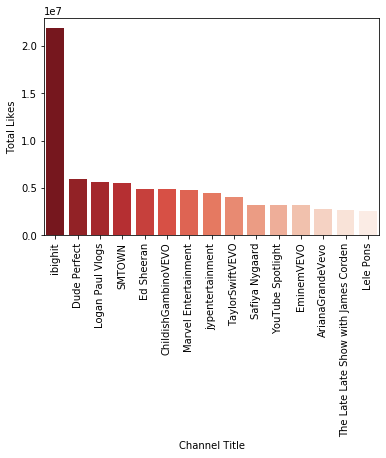

In [44]:
#most liked channel
ax = sns.barplot(x="Channel Title", y="Total Likes", data=pop_channel,
                 palette=("Reds_r"))
plt.xticks (rotation=90)
plt.savefig("output_data/total_likes_vs_pop_channels.png")


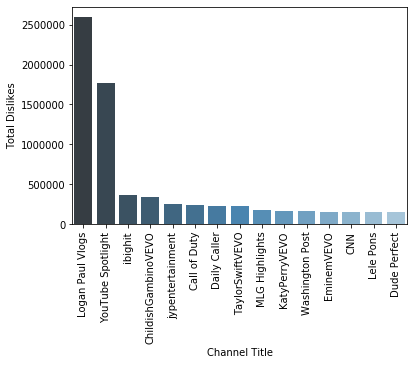

In [45]:
#most disliked channel
ax = sns.barplot(x="Channel Title", y="Total Dislikes", data=disl_channel,
                 palette=("Blues_d"))
plt.xticks (rotation=90)
plt.savefig("output_data/total_dislikes_vs_pop_channels.png")

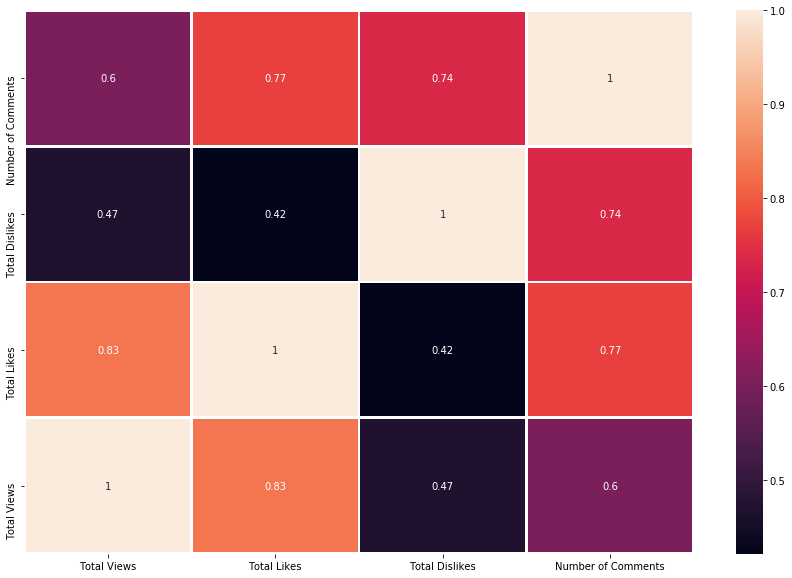

In [43]:
#correlation matrix between variables using pandas, matplotlib, seaborn
#sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True, annot_kws={'size':10}, linewidth=2, cmap= "BuPu") to change to purple
corelation = clean_df.corr()

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True, 
            annot_kws={'size':10}, linewidth=2)
ax.set_ylim([0,4])
plt.savefig("output_data/heatmap.png")

In [23]:
# #loads directly from the file/ choose to come back and work on it later
# light_to_dart = sns.load_dataset(USvideos)
# light_to_dark = light_to_dark.pivot("Total Likes", "Total Views", "Time Published")
# ax = sns.heatmap(USvideos)

In [24]:
#correlation matrix table
columns = ["Total Views", "Total Likes", "Total Dislikes"]
corr_matrix = clean_df[columns].corr()
corr_matrix

,Total Views,Total Likes,Total Dislikes
Total Views,1.000000,0.833698,0.469434
Total Likes,0.833698,1.000000,0.421076
Total Dislikes,0.469434,0.421076,1.000000


In [25]:
# circle plot choose to come back and work on it later 

# sns.set(style="white")
# random_state=np.randomState(10)        
# # mean=[ , ]
# # cov=[(  ,  ), (.   ,  )]
# x, y = rs.multivariate_normal(mean, cov, 500).T

# x= pd.Series(x,name = "xx")
# y= pd.Series(y, name = "oo")

# thisplot =sns.jointplot(x="Total Dislikes", y="Total Likes", kind="kde", size=7, space=0,)

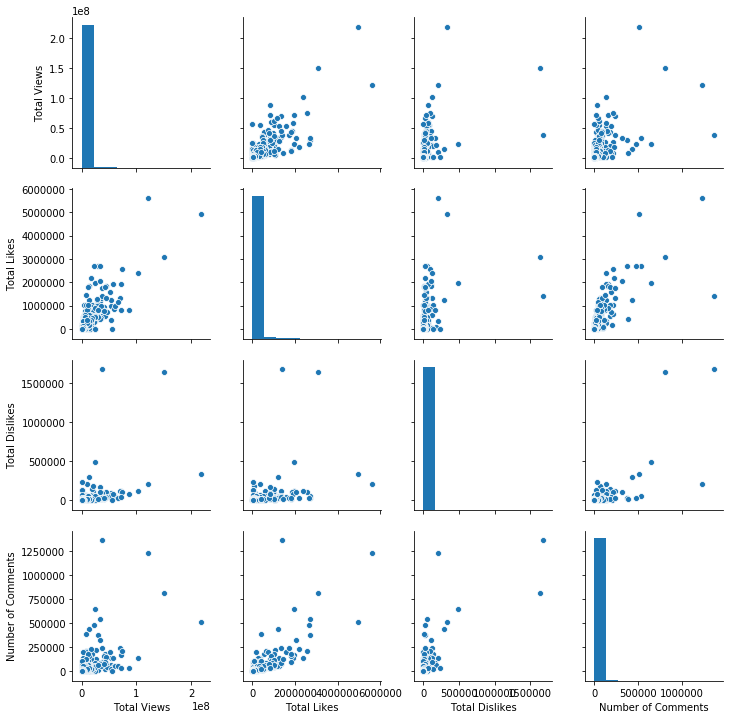

In [56]:
#relationship between two variables
sns.pairplot(clean_df)
plt.savefig("output_data/two_var_relationship.png")

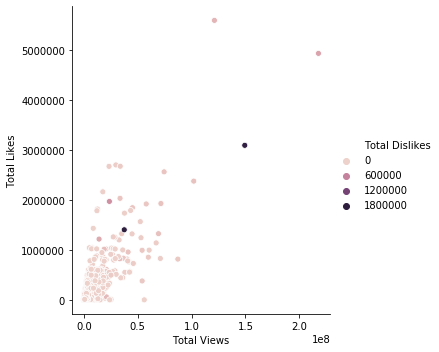

In [57]:
#scatterplot views vs likes
sns.color_palette("Blues")
sns.relplot(x="Total Views", y="Total Likes", hue="Total Dislikes", data=clean_df)
plt.savefig("output_data/total_views_total_likes_total_disl.png")

In [28]:
# #scatterplot 
# sns.relplot(x="Total Views", y="Total Likes" ,hue="Time Published", data=clean_df)
# sns.set(style="darkgrid")
# sns.relplot(x="Total Views", y="Total Likes" ,hue="Time Published",size="size", sizes=(15, 200), data=clean_df)


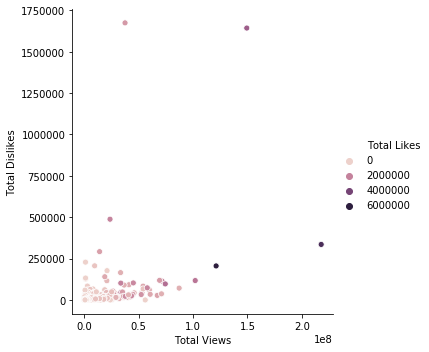

In [58]:
#scatterplot 
sns.relplot(x="Total Views", y="Total Dislikes" ,hue="Total Likes", data=clean_df)
plt.savefig("output_data/total_views_disl_total_likes.png")

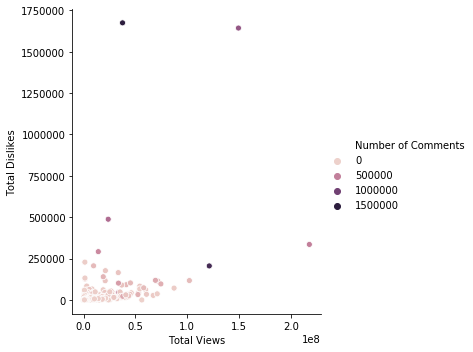

In [59]:
# #scatterplot 
sns.relplot(x="Total Views", y="Total Dislikes" ,hue="Number of Comments", data=clean_df)
plt.savefig("output_data/total_views_disl_comments.png")

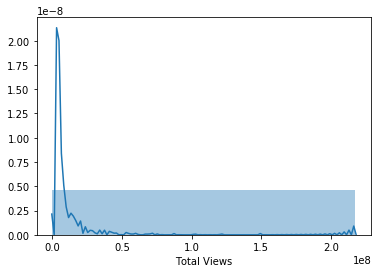

In [60]:
#histogram for ranges
sns.distplot(clean_df['Total Views'], bins=1)
plt.savefig("output_data/total_views_distplot.png")

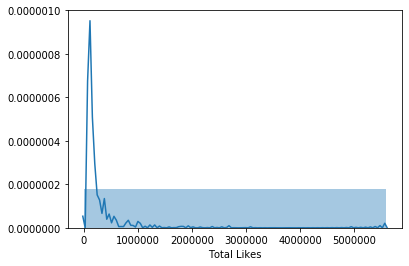

In [61]:
#histogram for ranges
sns.distplot(clean_df['Total Likes'], bins=1)
plt.savefig("output_data/total_likes_distplot.png")

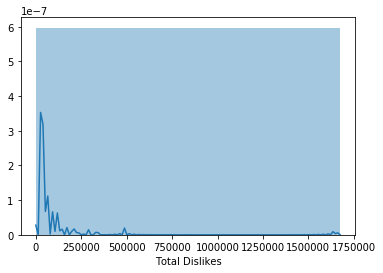

In [62]:
#histogram for ranges
sns.distplot(clean_df['Total Dislikes'], bins=1)
plt.savefig("output_data/total_disl_distplot.png")

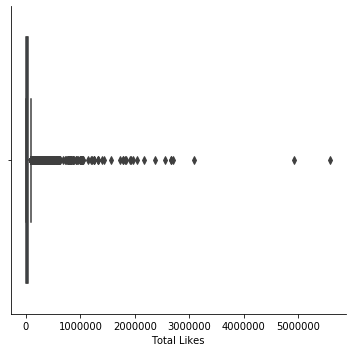

In [63]:
sns.catplot(x='Total Likes', kind='box',data= clean_df)
plt.savefig("output_data/total_likes.png")

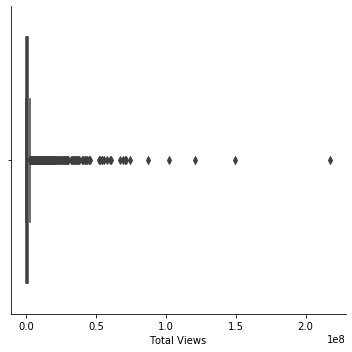

In [64]:
sns.catplot(x='Total Views', kind='box',data= clean_df)
plt.savefig("output_data/total_views.png")

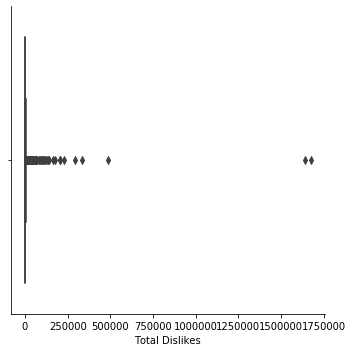

In [65]:
sns.catplot(x='Total Dislikes', kind='box',data= clean_df)
plt.savefig("output_data/total_disl.png")

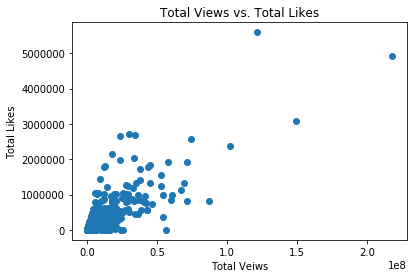

In [68]:
# Plot View versus likes            
x_values = clean_df["Total Views"]
y_values = clean_df['Total Likes']
plt.scatter(x_values,y_values)
plt.title("Total Views vs. Total Likes")
plt.xlabel('Total Veiws')
plt.ylabel('Total Likes')
plt.savefig("output_data/views_vs_likes.png")
plt.show()


In [69]:
# Create a function to create Linear Regression plots

def linearplot(x_values,y_values,y_label, coor):
    

    print(f"The r-squared is: {round(st.pearsonr(x_values, y_values)[0],2)}")
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coor,fontsize=15,color="red")
 
    plt.xlabel('Total Views')
    plt.ylabel(y_label)

The r-squared is: 0.83


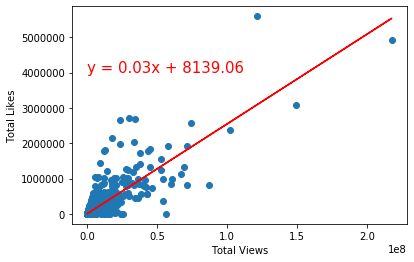

In [70]:
x_values= clean_df["Total Views"]
y_values= clean_df["Total Likes"]
linearplot(x_values, y_values, "Total Likes", (1.5,4000000))

plt.savefig("output_data/total_views_vs_ total_likes_regr.png")
plt.show()

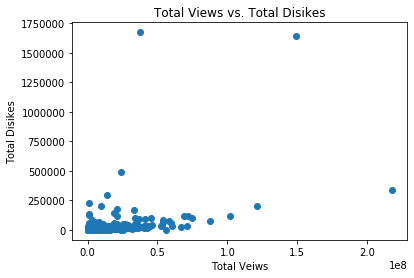

In [71]:
# Plot View versus likes            
x_values = clean_df["Total Views"]
y_values = clean_df['Total Dislikes']
plt.scatter(x_values,y_values)
plt.title("Total Views vs. Total Disikes")
plt.xlabel('Total Veiws')
plt.ylabel('Total Disikes')
plt.savefig("output_data/total_views_vs_total dislikes.png")
plt.show()

In [72]:
# Create a function to create Linear Regression plots

def linearplot(x_values,y_values,y_label, coor):
    

    print(f"The r-squared is: {round(st.pearsonr(x_values, y_values)[0],2)}")
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coor,fontsize=15,color="red")
 
    plt.xlabel('Total Views')
    plt.ylabel(y_label)

The r-squared is: 0.47


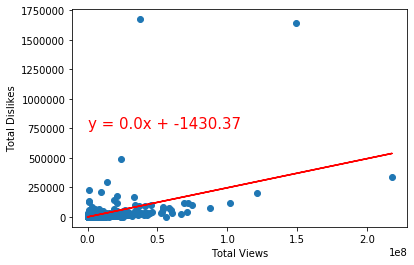

In [73]:
x_values= clean_df["Total Views"]
y_values= clean_df["Total Dislikes"]
linearplot(x_values, y_values, "Total Dislikes", (10,750000))

plt.savefig("output_data/total_views_vs_total_likes_regr.png")
plt.show()